# План работы
1. Определить необходимые поля и создать структуру набора данных
2. Провести предварительную обработку текстов размеченного датасета
3. Провести тематическое моделирование
4. Векторизация
5. Классификация

# Импорт библиотек

In [134]:
import pandas
import pandas as pd

In [135]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rusla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rusla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rusla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [136]:
pip install pymorphy3

Note: you may need to restart the kernel to use updated packages.


In [137]:
import pandas as pd
import string
import re
import nltk
import pymorphy3

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.decomposition import TruncatedSVD

In [320]:
df = pd.read_csv("TextLanguage.csv", encoding='utf-8-sig')

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [322]:
df.head(5)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [323]:
df["Language"].unique()

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)

In [371]:
malayalam_rows = df[df["Language"] == "Malayalam"]
for index, row in malayalam_rows.iterrows():
    print(f"Index: {index}, Text: {row['Text']}")

Index: 1385, Text: ഭൗതികപ്രപഞ്ചത്തെ മൊത്തത്തിൽ സൂചിപ്പിക്കുന്ന പദമാണ് പ്രകൃതി (ജർമൻ: Natur, ഫ്രഞ്ച്, ഇംഗ്ലീഷ്: Nature, സ്പാനിഷ്: Naturaleza, പോർച്ചുഗീസ്: Natureza).
Index: 1386, Text: ഭൗതികപ്രതിഭാസങ്ങളും ജീവനും പ്രകൃതിയുടെ ഘടകങ്ങളാണ്.
Index: 1387, Text: മനുഷ്യനിർമിതമായ വസ്തുക്കളെ പ്രകൃതിയുടെ ഭാഗമായി കണക്കാക്കാറില്ല.
Index: 1388, Text: അവയെ കൃത്രിമം എന്ന് വിശേഷിപ്പിക്കുന്നുഅഭിപ്രായസ്വാതന്ത്ര്യം ഇംഗ്ലീഷ് പദമായ nature എന്നതിൻറെ ഉൽപത്തി ലാറ്റിൻ പദമായ natura എന്നതിൽ നിന്നാണ്.
Index: 1389, Text: പ്രകൃതി എന്ന പദം പ്രപഞ്ചത്തെയും അതിലെ സമസ്ത പ്രതിഭാസങ്ങളെയും ഉൾ‍ക്കൊള്ളുന്നു.
Index: 1390, Text: അറിയപ്പെടുന്ന ഗ്രഹങ്ങളിൽ ജീവൻ നിലനിൽക്കുന്നതായി അറിവുള്ള ഏകഗ്രഹമാണ് ഭൂമി.
Index: 1391, Text: സൗരയൂഥത്തിൽ സൂര്യനിൽ നിന്ന് മൂന്നാം സ്ഥാനമാണ് ഭൂമിക്ക് ഉള്ളത്.
Index: 1392, Text: പ്രപഞ്ചത്തിലെ വസ്തുക്കളുടെ അന്തരീക്ഷത്തിന് പുറത്തുള്ള താരതമ്യേന ശൂന്യമായ സ്ഥലത്തെ ബഹിരാകാശം എന്ന് പറയുന്നു(?).
Index: 1393, Text: ദർശനം ശാസ്ത്രം ==കുറിപ്പുകളും അവലംബങ്ങളും==ഉരുൾപൊട്ടൽ   The image must be attributed with a credit line

In [324]:
language_counts = df['Language'].value_counts()

In [325]:
language_counts

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

In [326]:
lang_to_example = df.groupby('Language')['Text'].first().to_dict()


In [327]:
for lang, text in lang_to_example.items():
    print(f"{lang}\n{text}\n")

Arabic
نيتشر (بالإنجليزية: Nature)‏ قد تعني:    تعديل - تعديل مصدري - تعديل ويكي بيانات ويكيبيديا (تلفظ ‎[wi:ki:bi:dija:]‏ وتلحن ‎[wikipi:dia]‏؛ تلفظ بالإنجليزية ‎/ˌwɪkiˈpi:di.ə/‏)[7] والكلمة مشتقة من مقطعين: ويكي wiki وتعني بلغة هاواي "بالغ السرعة"، والثاني بيديا pedia ومشتق من كلمة موسوعة encyclopedia، ويكيبيديا هي موسوعة متعددة اللغات، مبنية على الويب، ذات محتوى حر، تشغلها مؤسسة ويكيميديا، التي هي منظمة غير ربحية.

Danish
Nature er et britisk multidisciplinært videnskabeligt tidsskrift, der blev udgivet første gang den 4. november 1869.

Dutch
Nature (Engels voor 'natuur') is een Brits vooral natuurwetenschappelijk tijdschrift.

English
 Nature, in the broadest sense, is the natural, physical, material world or universe.

French
Si vous disposez d'ouvrages ou d'articles de référence ou si vous connaissez des sites web de qualité traitant du thème abordé ici, merci de compléter l'article en donnant les références utiles à sa vérifiabilité et en les liant à la section « Notes et référ

# Предварительная обработка данных

* Перевод всех букв в тексте в нижний регистр
* Удаление знаков препинания
* Токенизация по словам
* Удаление стоп слов
* Стемминг (приведение слов к нормальной форме)
* Лемматизация

### Добавление стоп слов

In [328]:
pip install inltk

Note: you may need to restart the kernel to use updated packages.


In [329]:
pip install -U spacy

Note: you may need to restart the kernel to use updated packages.


In [330]:
pip install indic-nlp-library

Note: you may need to restart the kernel to use updated packages.


In [331]:
russian_stopwords = stopwords.words("russian")
english_stopwords = stopwords.words("english")
french_stopwords = stopwords.words("french")
spanish_stopwords = stopwords.words("spanish")
portugeese_stopwords = stopwords.words("portuguese")
italian_stopwords = stopwords.words("italian")
sweedish_stopwords = stopwords.words("swedish")
dutch_stopwords = stopwords.words("dutch")
arabic_stopwords = stopwords.words("arabic")
turkish_stopwords = stopwords.words("turkish")
german_stopwords = stopwords.words("german")
danish_stopwords = stopwords.words("danish")
greek_stopwords = stopwords.words("greek")


In [332]:
def remove_punctuation(text): 
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text): 
    return ''.join([i if not i.isdigit() else ' ' for i in text])

def remove_multiple_spaces(text): 
    return re.sub(r'\s+', ' ', text, flags=re.I)

st = '❯\xa0—«»'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [333]:
df['Обработанный текст'] = [remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation((text.lower()))))) for text in df['Text']]

In [334]:
df.head(60)

,Text,Language,Обработанный текст
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural p...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phys...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...
5,"[2] In ancient philosophy, natura is mostly us...",English,in ancient philosophy natura is mostly used a...
6,"[3][4] \nThe concept of nature as a whole, the...",English,the concept of nature as a whole the physical...
7,During the advent of modern scientific method ...,English,during the advent of modern scientific method ...
8,"[5][6] With the Industrial revolution, nature ...",English,with the industrial revolution nature increas...
9,"However, a vitalist vision of nature, closer t...",English,however a vitalist vision of nature closer to ...


In [335]:
df.iloc[5000:5200]

,Text,Language,Обработанный текст
5000,Con excepción de ciertas personas remuneradas ...,Spanish,con excepción de ciertas personas remuneradas ...
5001,"[132]​ En total, la comunidad está conformada ...",Spanish,​ en total la comunidad está conformada por m...
5002,[134]​ En las páginas internas de Wikipedia —d...,Spanish,​ en las páginas internas de wikipedia dirigi...
5003,Hay diversas formas de colaborar: desde crear ...,Spanish,hay diversas formas de colaborar desde crear n...
5004,"Actualmente, 67 son administradores humanos y ...",Spanish,actualmente son administradores humanos y son ...
...,...,...,...
5195,Los algoritmos de MVS usan un conjunto de ejem...,Spanish,los algoritmos de mvs usan un conjunto de ejem...
5196,El análisis por agrupamiento (clustering en in...,Spanish,el análisis por agrupamiento clustering en ing...
5197,Las técnicas de agrupamiento hacen inferencias...,Spanish,las técnicas de agrupamiento hacen inferencias...
5198,El agrupamiento es un método de aprendizaje no...,Spanish,el agrupamiento es un método de aprendizaje no...


In [336]:
df.iloc[5500:6900]

,Text,Language,Обработанный текст
5500,No estoy seguro de eso.,Spanish,no estoy seguro de eso
5501,"no, no lo creo.",Spanish,no no lo creo
5502,haciendo planes.,Spanish,haciendo planes
5503,¿Qué haces esta noche?,Spanish,¿qué haces esta noche
5504,¿Tienes planes para mañana?,Spanish,¿tienes planes para mañana
...,...,...,...
6895,"de er som gode for dig, det ville være bedre u...",Danish,de er som gode for dig det ville være bedre ud...
6896,"hvis noget overrasker dig, kan du også sige, a...",Danish,hvis noget overrasker dig kan du også sige at ...
6897,"Jeg kan ikke tro det, du skal være en sjov på ...",Danish,jeg kan ikke tro det du skal være en sjov på m...
6898,"hvis du vil have nogen, der bare lyder som at ...",Danish,hvis du vil have nogen der bare lyder som at g...


In [337]:
df['Text'][8]

'[5][6] With the Industrial revolution, nature increasingly became seen as the part of reality deprived from intentional intervention\xa0: it was hence considered as sacred by some traditions (Rousseau, American transcendentalism) or a mere decorum for divine providence or human history (Hegel, Marx).'

In [338]:
df["Обработанный текст"][8]

' with the industrial revolution nature increasingly became seen as the part of reality deprived from intentional intervention it was hence considered as sacred by some traditions rousseau american transcendentalism or a mere decorum for divine providence or human history hegel marx '

#### Отображение стоп слов

In [339]:
russian_stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [340]:
english_stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [341]:
french_stopwords

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [342]:
spanish_stopwords

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [343]:
portugeese_stopwords

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [344]:
italian_stopwords

['ad',
 'al',
 'allo',
 'ai',
 'agli',
 'all',
 'agl',
 'alla',
 'alle',
 'con',
 'col',
 'coi',
 'da',
 'dal',
 'dallo',
 'dai',
 'dagli',
 'dall',
 'dagl',
 'dalla',
 'dalle',
 'di',
 'del',
 'dello',
 'dei',
 'degli',
 'dell',
 'degl',
 'della',
 'delle',
 'in',
 'nel',
 'nello',
 'nei',
 'negli',
 'nell',
 'negl',
 'nella',
 'nelle',
 'su',
 'sul',
 'sullo',
 'sui',
 'sugli',
 'sull',
 'sugl',
 'sulla',
 'sulle',
 'per',
 'tra',
 'contro',
 'io',
 'tu',
 'lui',
 'lei',
 'noi',
 'voi',
 'loro',
 'mio',
 'mia',
 'miei',
 'mie',
 'tuo',
 'tua',
 'tuoi',
 'tue',
 'suo',
 'sua',
 'suoi',
 'sue',
 'nostro',
 'nostra',
 'nostri',
 'nostre',
 'vostro',
 'vostra',
 'vostri',
 'vostre',
 'mi',
 'ti',
 'ci',
 'vi',
 'lo',
 'la',
 'li',
 'le',
 'gli',
 'ne',
 'il',
 'un',
 'uno',
 'una',
 'ma',
 'ed',
 'se',
 'perché',
 'anche',
 'come',
 'dov',
 'dove',
 'che',
 'chi',
 'cui',
 'non',
 'più',
 'quale',
 'quanto',
 'quanti',
 'quanta',
 'quante',
 'quello',
 'quelli',
 'quella',
 'quelle',
 'q

In [345]:
sweedish_stopwords

['och',
 'det',
 'att',
 'i',
 'en',
 'jag',
 'hon',
 'som',
 'han',
 'på',
 'den',
 'med',
 'var',
 'sig',
 'för',
 'så',
 'till',
 'är',
 'men',
 'ett',
 'om',
 'hade',
 'de',
 'av',
 'icke',
 'mig',
 'du',
 'henne',
 'då',
 'sin',
 'nu',
 'har',
 'inte',
 'hans',
 'honom',
 'skulle',
 'hennes',
 'där',
 'min',
 'man',
 'ej',
 'vid',
 'kunde',
 'något',
 'från',
 'ut',
 'när',
 'efter',
 'upp',
 'vi',
 'dem',
 'vara',
 'vad',
 'över',
 'än',
 'dig',
 'kan',
 'sina',
 'här',
 'ha',
 'mot',
 'alla',
 'under',
 'någon',
 'eller',
 'allt',
 'mycket',
 'sedan',
 'ju',
 'denna',
 'själv',
 'detta',
 'åt',
 'utan',
 'varit',
 'hur',
 'ingen',
 'mitt',
 'ni',
 'bli',
 'blev',
 'oss',
 'din',
 'dessa',
 'några',
 'deras',
 'blir',
 'mina',
 'samma',
 'vilken',
 'er',
 'sådan',
 'vår',
 'blivit',
 'dess',
 'inom',
 'mellan',
 'sådant',
 'varför',
 'varje',
 'vilka',
 'ditt',
 'vem',
 'vilket',
 'sitta',
 'sådana',
 'vart',
 'dina',
 'vars',
 'vårt',
 'våra',
 'ert',
 'era',
 'vilkas']

In [346]:
dutch_stopwords

['de',
 'en',
 'van',
 'ik',
 'te',
 'dat',
 'die',
 'in',
 'een',
 'hij',
 'het',
 'niet',
 'zijn',
 'is',
 'was',
 'op',
 'aan',
 'met',
 'als',
 'voor',
 'had',
 'er',
 'maar',
 'om',
 'hem',
 'dan',
 'zou',
 'of',
 'wat',
 'mijn',
 'men',
 'dit',
 'zo',
 'door',
 'over',
 'ze',
 'zich',
 'bij',
 'ook',
 'tot',
 'je',
 'mij',
 'uit',
 'der',
 'daar',
 'haar',
 'naar',
 'heb',
 'hoe',
 'heeft',
 'hebben',
 'deze',
 'u',
 'want',
 'nog',
 'zal',
 'me',
 'zij',
 'nu',
 'ge',
 'geen',
 'omdat',
 'iets',
 'worden',
 'toch',
 'al',
 'waren',
 'veel',
 'meer',
 'doen',
 'toen',
 'moet',
 'ben',
 'zonder',
 'kan',
 'hun',
 'dus',
 'alles',
 'onder',
 'ja',
 'eens',
 'hier',
 'wie',
 'werd',
 'altijd',
 'doch',
 'wordt',
 'wezen',
 'kunnen',
 'ons',
 'zelf',
 'tegen',
 'na',
 'reeds',
 'wil',
 'kon',
 'niets',
 'uw',
 'iemand',
 'geweest',
 'andere']

In [347]:
arabic_stopwords

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [348]:
turkish_stopwords

['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [349]:
german_stopwords

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'dass',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 '

In [350]:
danish_stopwords

['og',
 'i',
 'jeg',
 'det',
 'at',
 'en',
 'den',
 'til',
 'er',
 'som',
 'på',
 'de',
 'med',
 'han',
 'af',
 'for',
 'ikke',
 'der',
 'var',
 'mig',
 'sig',
 'men',
 'et',
 'har',
 'om',
 'vi',
 'min',
 'havde',
 'ham',
 'hun',
 'nu',
 'over',
 'da',
 'fra',
 'du',
 'ud',
 'sin',
 'dem',
 'os',
 'op',
 'man',
 'hans',
 'hvor',
 'eller',
 'hvad',
 'skal',
 'selv',
 'her',
 'alle',
 'vil',
 'blev',
 'kunne',
 'ind',
 'når',
 'være',
 'dog',
 'noget',
 'ville',
 'jo',
 'deres',
 'efter',
 'ned',
 'skulle',
 'denne',
 'end',
 'dette',
 'mit',
 'også',
 'under',
 'have',
 'dig',
 'anden',
 'hende',
 'mine',
 'alt',
 'meget',
 'sit',
 'sine',
 'vor',
 'mod',
 'disse',
 'hvis',
 'din',
 'nogle',
 'hos',
 'blive',
 'mange',
 'ad',
 'bliver',
 'hendes',
 'været',
 'thi',
 'jer',
 'sådan']

In [351]:
greek_stopwords

['αλλα',
 'αν',
 'αντι',
 'απο',
 'αυτα',
 'αυτεσ',
 'αυτη',
 'αυτο',
 'αυτοι',
 'αυτοσ',
 'αυτουσ',
 'αυτων',
 'αἱ',
 'αἳ',
 'αἵ',
 'αὐτόσ',
 'αὐτὸς',
 'αὖ',
 'γάρ',
 'γα',
 'γα^',
 'γε',
 'για',
 'γοῦν',
 'γὰρ',
 "δ'",
 'δέ',
 'δή',
 'δαί',
 'δαίσ',
 'δαὶ',
 'δαὶς',
 'δε',
 'δεν',
 "δι'",
 'διά',
 'διὰ',
 'δὲ',
 'δὴ',
 'δ’',
 'εαν',
 'ειμαι',
 'ειμαστε',
 'ειναι',
 'εισαι',
 'ειστε',
 'εκεινα',
 'εκεινεσ',
 'εκεινη',
 'εκεινο',
 'εκεινοι',
 'εκεινοσ',
 'εκεινουσ',
 'εκεινων',
 'ενω',
 'επ',
 'επι',
 'εἰ',
 'εἰμί',
 'εἰμὶ',
 'εἰς',
 'εἰσ',
 'εἴ',
 'εἴμι',
 'εἴτε',
 'η',
 'θα',
 'ισωσ',
 'κ',
 'καί',
 'καίτοι',
 'καθ',
 'και',
 'κατ',
 'κατά',
 'κατα',
 'κατὰ',
 'καὶ',
 'κι',
 'κἀν',
 'κἂν',
 'μέν',
 'μή',
 'μήτε',
 'μα',
 'με',
 'μεθ',
 'μετ',
 'μετά',
 'μετα',
 'μετὰ',
 'μη',
 'μην',
 'μἐν',
 'μὲν',
 'μὴ',
 'μὴν',
 'να',
 'ο',
 'οι',
 'ομωσ',
 'οπωσ',
 'οσο',
 'οτι',
 'οἱ',
 'οἳ',
 'οἷς',
 'οὐ',
 'οὐδ',
 'οὐδέ',
 'οὐδείσ',
 'οὐδεὶς',
 'οὐδὲ',
 'οὐδὲν',
 'οὐκ',
 'οὐχ',
 'οὐχὶ',
 'οὓς'

In [352]:
stopwords_dict = {
    'russian': set(stopwords.words('russian')),
    'english': set(stopwords.words('english')),
    'french': set(stopwords.words('french')),
    'spanish': set(stopwords.words('spanish')),
    'portuguese': set(stopwords.words('portuguese')),
    'italian': set(stopwords.words('italian')),
    'swedish': set(stopwords.words('swedish')),
    'dutch': set(stopwords.words('dutch')),
    'arabic': set(stopwords.words('arabic')),
    'turkish': set(stopwords.words('turkish')),
    'german': set(stopwords.words('german')),
    'danish': set(stopwords.words('danish')),
    'greek': set(stopwords.words('greek')),
}

# Объединяем все стоп-слова в один set для быстрой проверки
all_stopwords = set()
for lang in stopwords_dict.values():
    all_stopwords.update(lang)

def tokenize(text):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.lower() not in all_stopwords]
    return " ".join(tokens)

In [353]:
df['Токенизированный текст'] = [tokenize(text) for text in df['Обработанный текст']]

In [354]:
df

,Text,Language,Обработанный текст,Токенизированный текст
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural p...,nature broadest sense natural physical materia...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phys...,nature refer phenomena physical world life gen...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...,study nature large part science
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...,although humans part nature human activity oft...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...,word nature borrowed old french nature derived...
...,...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹೇಗೆ ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ್...,ಹೇಗೆ ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ್...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


In [355]:
df.iloc[5000:5200]

,Text,Language,Обработанный текст,Токенизированный текст
5000,Con excepción de ciertas personas remuneradas ...,Spanish,con excepción de ciertas personas remuneradas ...,excepción ciertas personas remuneradas fundaci...
5001,"[132]​ En total, la comunidad está conformada ...",Spanish,​ en total la comunidad está conformada por m...,​ total comunidad conformada millones usuarios...
5002,[134]​ En las páginas internas de Wikipedia —d...,Spanish,​ en las páginas internas de wikipedia dirigi...,​ páginas internas wikipedia dirigidas fundame...
5003,Hay diversas formas de colaborar: desde crear ...,Spanish,hay diversas formas de colaborar desde crear n...,diversas formas colaborar crear nuevos artícul...
5004,"Actualmente, 67 son administradores humanos y ...",Spanish,actualmente son administradores humanos y son ...,actualmente administradores humanos sistemas m...
...,...,...,...,...
5195,Los algoritmos de MVS usan un conjunto de ejem...,Spanish,los algoritmos de mvs usan un conjunto de ejem...,algoritmos mvs usan conjunto ejemplos entrenam...
5196,El análisis por agrupamiento (clustering en in...,Spanish,el análisis por agrupamiento clustering en ing...,análisis agrupamiento clustering inglés clasif...
5197,Las técnicas de agrupamiento hacen inferencias...,Spanish,las técnicas de agrupamiento hacen inferencias...,técnicas agrupamiento hacen inferencias difere...
5198,El agrupamiento es un método de aprendizaje no...,Spanish,el agrupamiento es un método de aprendizaje no...,agrupamiento método aprendizaje supervisado té...


In [356]:
stemmer = SnowballStemmer("russian")

# Подготовка словаря стоп-слов (объединение всех языков)
all_stopwords = set()
for lang_stopwords in stopwords_dict.values():
    all_stopwords.update(lang_stopwords)

# Функция для обработки текста
def process_text(text):
    try:
        # Токенизация
        tokens = word_tokenize(text)
        
        # Удаление стоп-слов и стемминг
        processed_tokens = [
            stemmer.stem(word) 
            for word in tokens 
            if word.lower() not in all_stopwords
        ]
        
        return " ".join(processed_tokens)
    except Exception as e:
        print(f"Error processing text: {e}")
        return text  # Возвращаем оригинал в случае ошибки

# Применение к DataFrame
df['Стеммингированный текст'] = df['Токенизированный текст'].apply(process_text)

In [357]:
df

,Text,Language,Обработанный текст,Токенизированный текст,Стеммингированный текст
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural p...,nature broadest sense natural physical materia...,nature broadest sense natural physical materia...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phys...,nature refer phenomena physical world life gen...,nature refer phenomena physical world life gen...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...,study nature large part science,study nature large part science
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...,although humans part nature human activity oft...,although humans part nature human activity oft...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...,word nature borrowed old french nature derived...,word nature borrowed old french nature derived...
...,...,...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹೇಗೆ ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ್...,ಹೇಗೆ ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ್...,ಹೇಗೆ ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ್...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


In [358]:
df['Стеммингированный текст'][8]

'industrial revolution nature increasingly became seen part reality deprived intentional intervention hence considered sacred traditions rousseau american transcendentalism mere decorum divine providence human history hegel marx'

In [359]:
df['Стеммингированный текст'][5994]

'nature перевод англ'

In [360]:
df[df['Language'] == 'Russian']

,Text,Language,Обработанный текст,Токенизированный текст,Стеммингированный текст
5994,Nature (в переводе с англ.,Russian,nature в переводе с англ,nature переводе англ,nature перевод англ
5995,— «Природа») — один из самых старых и авторите...,Russian,природа один из самых старых и авторитетных о...,природа самых старых авторитетных общенаучных ...,природ сам стар авторитетн общенаучн журнал
5996,"Публикует исследования, посвящённые широкому к...",Russian,публикует исследования посвящённые широкому кр...,публикует исследования посвящённые широкому кр...,публик исследован посвящен широк круг вопрос о...
5997,Первый номер журнала Nature был издан 4 ноября...,Russian,первый номер журнала nature был издан ноября г...,первый номер журнала nature издан ноября года ...,перв номер журна nature изда ноябр год английс...
5998,Nature редактируется в Великобритании издатель...,Russian,nature редактируется в великобритании издатель...,nature редактируется великобритании издательст...,nature редактир великобритан издательств natur...
...,...,...,...,...,...
6681,Однажды Мелли и Терри снова пришли встретиться...,Russian,однажды мелли и терри снова пришли встретиться...,однажды мелли терри снова пришли встретиться м...,однажд мелл терр снов пришл встрет мариа
6682,"О, привет, вы двое, так скажите нам Мэриан.",Russian,о привет вы двое так скажите нам мэриан,привет двое скажите нам мэриан,привет дво скаж нам мэриа
6683,Как' теперь нарциссизм Мэриан рассказал им обо...,Russian,как теперь нарциссизм мэриан рассказал им обои...,нарциссизм мэриан рассказал обоим произошло си...,нарциссизм мэриа рассказа обо произошл сильн и...
6684,"Думаю, она не хотела бы больше золотого хлеба,...",Russian,думаю она не хотела бы больше золотого хлеба а...,думаю хотела золотого хлеба знаешь,дума хотел золот хлеб знаеш


In [361]:
from nltk.tokenize import word_tokenize
from pymorphy3 import MorphAnalyzer

# Инициализация анализатора
morph = MorphAnalyzer()

# Подготовка объединённого множества стоп-слов
all_stopwords = set().union(*stopwords_dict.values())

# Функция для обработки текста
def lemmatize_text(text):
    try:
        tokens = word_tokenize(text)
        lemmas = [
            morph.parse(word)[0].normal_form
            for word in tokens
            if word.lower() not in all_stopwords and word.isalpha()  # проверка на стоп-слова и буквы
        ]
        return " ".join(lemmas)
    except Exception as e:
        print(f"Error processing text: {e}")
        return text

# Применение к DataFrame
df['Лемматизированный текст'] = df['Токенизированный текст'].apply(lemmatize_text)

In [362]:
df.head(10)

,Text,Language,Обработанный текст,Токенизированный текст,Стеммингированный текст,Лемматизированный текст
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural p...,nature broadest sense natural physical materia...,nature broadest sense natural physical materia...,nature broadest sense natural physical materia...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phys...,nature refer phenomena physical world life gen...,nature refer phenomena physical world life gen...,nature refer phenomena physical world life gen...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...,study nature large part science,study nature large part science,study nature large part science
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...,although humans part nature human activity oft...,although humans part nature human activity oft...,although humans part nature human activity oft...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...,word nature borrowed old french nature derived...,word nature borrowed old french nature derived...,word nature borrowed old french nature derived...
5,"[2] In ancient philosophy, natura is mostly us...",English,in ancient philosophy natura is mostly used a...,ancient philosophy natura mostly used latin tr...,ancient philosophy natura mostly used latin tr...,ancient philosophy natura mostly used latin tr...
6,"[3][4] \nThe concept of nature as a whole, the...",English,the concept of nature as a whole the physical...,concept nature whole physical universe one sev...,concept nature whole physical universe one sev...,concept nature whole physical universe one sev...
7,During the advent of modern scientific method ...,English,during the advent of modern scientific method ...,advent modern scientific method last several c...,advent modern scientific method last several c...,advent modern scientific method last several c...
8,"[5][6] With the Industrial revolution, nature ...",English,with the industrial revolution nature increas...,industrial revolution nature increasingly beca...,industrial revolution nature increasingly beca...,industrial revolution nature increasingly beca...
9,"However, a vitalist vision of nature, closer t...",English,however a vitalist vision of nature closer to ...,however vitalist vision nature closer presocra...,however vitalist vision nature closer presocra...,however vitalist vision nature closer presocra...


In [363]:
df["Лемматизированный текст"][8]

'industrial revolution nature increasingly became seen part reality deprived intentional intervention hence considered sacred traditions rousseau american transcendentalism mere decorum divine providence human history hegel marx'

In [364]:
df["Лемматизированный текст"][5994]

'nature перевод англ'

## Облако слов

In [365]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [366]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [367]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

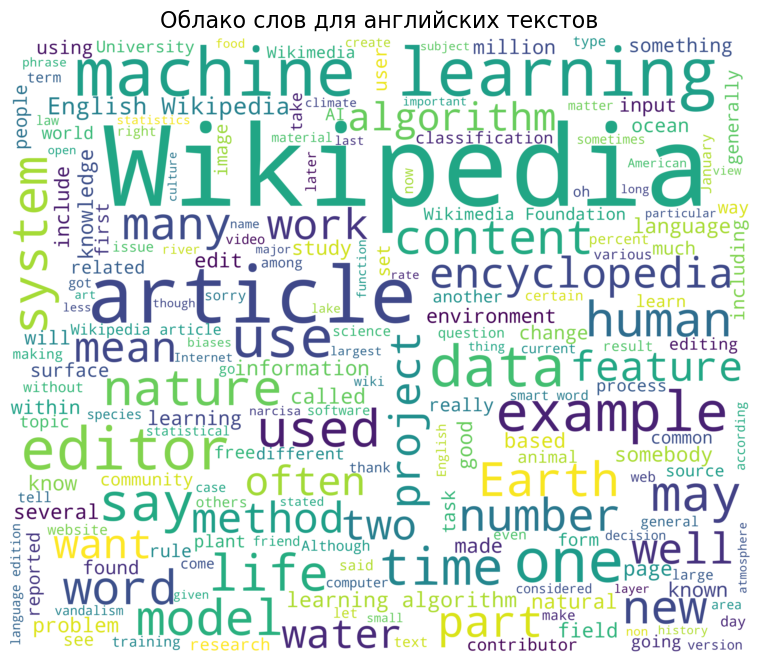

In [265]:
corpus = get_corpus(df[df["Language"] == "English"]['Text'].values)  # Правильная фильтрация

# Генерация облака слов
procWordCloud = get_wordCloud(corpus)

# Визуализация
fig = plt.figure(figsize=(20, 8))
plt.imshow(procWordCloud, interpolation='bilinear')  # Добавлен параметр interpolation
plt.axis('off')
plt.title('Облако слов для английских текстов', fontsize=16)  # Добавлен заголовок
plt.show()

'English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'

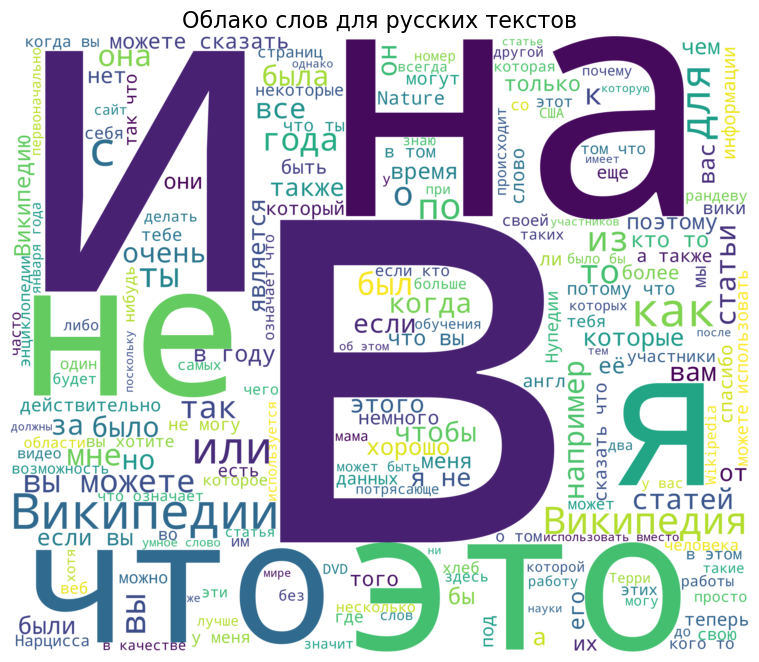

In [266]:
corpus = get_corpus(df[df["Language"] == "Russian"]['Text'].values)  # Правильная фильтрация

# Генерация облака слов
procWordCloud = get_wordCloud(corpus)

# Визуализация
fig = plt.figure(figsize=(20, 8))
plt.imshow(procWordCloud, interpolation='bilinear')  # Добавлен параметр interpolation
plt.axis('off')
plt.title('Облако слов для русских текстов', fontsize=16)  # Добавлен заголовок
plt.show()

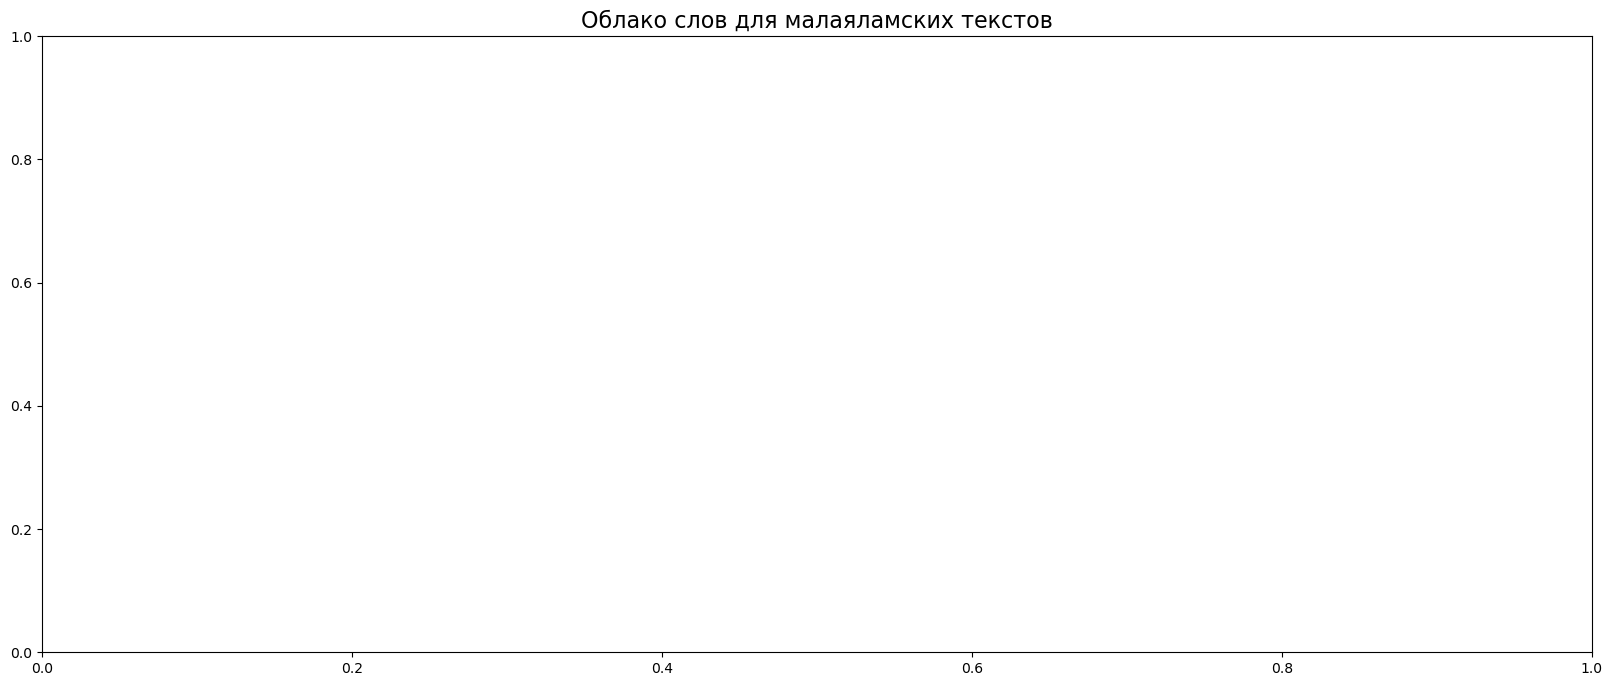

In [400]:
# Добавляем обработку UTF-8 при получении corpus
malayalam_texts = df[df["Language"] == "Malayalam"]['Text'].values
corpus = get_corpus([text.decode('utf-8') if isinstance(text, bytes) else str(text) for text in malayalam_texts])

# Генерация облака слов с указанием UTF-8 шрифта
procWordCloud = WordCloud(

    width=3000,
    height=2500,
    background_color='white',
    collocations=False
).generate(' '.join(corpus))

# Визуализация с исправленным заголовком
fig = plt.figure(figsize=(20, 8))
plt.title('Облако слов для малаяламских текстов', fontsize=16)  # Исправленный заголовок
plt.show()

In [268]:
# %%time
# for i in df["Language"].unique():
#     corpus = get_corpus(df[df["Language"] == i]['Text'].values.decode("UTF-8"))  # Правильная фильтрация

#     # Генерация облака слов
#     procWordCloud = get_wordCloud(corpus)
    
#     # Визуализация
#     fig = plt.figure(figsize=(20, 8))
#     plt.imshow(procWordCloud, interpolation='bilinear')  # Добавлен параметр interpolation
#     plt.axis('off')
#     plt.title('Облако слов для английских текстов', fontsize=16)  # Добавлен заголовок
#     plt.show()

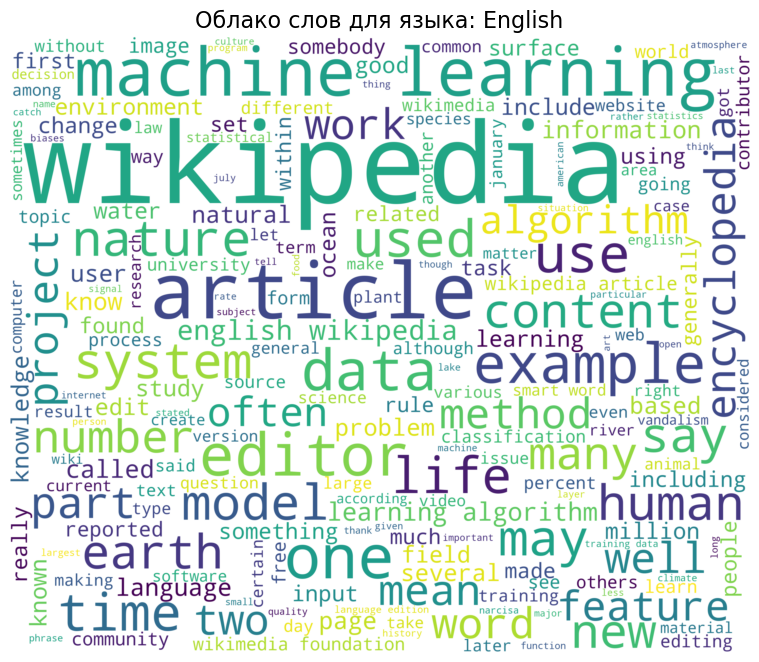

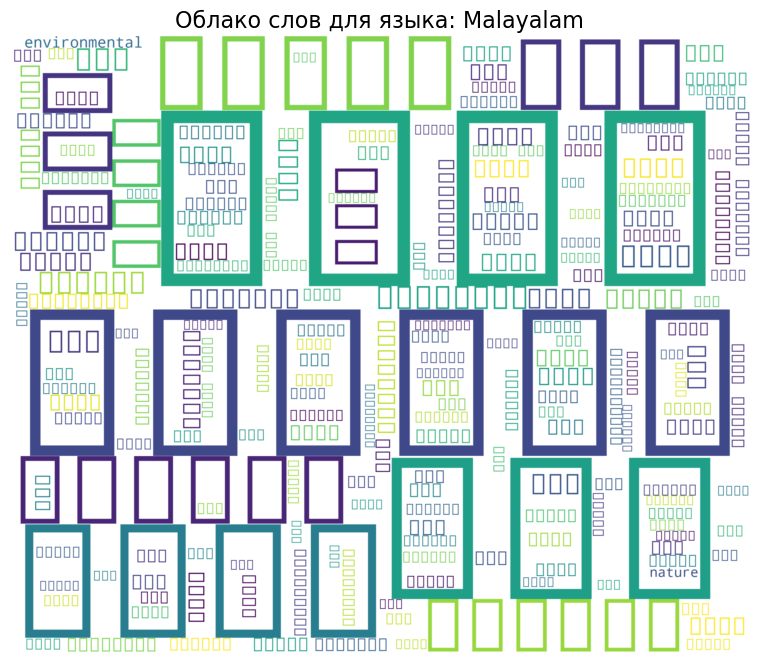

KeyboardInterrupt: 

In [211]:
# %%time
# for lang in df["Language"].unique():
#     # Получаем тексты для текущего языка
#     texts = df[df["Language"] == lang]['Лемматизированный текст-UTF-8'].values
    
#     # Преобразуем каждый текст в UTF-8
#     corpus = get_corpus([text.encode('utf-8') if isinstance(text, bytes) else str(text) for text in texts])
    
#     # Генерация облака слов
#     procWordCloud = get_wordCloud(corpus)
    
#     # Визуализация
#     plt.figure(figsize=(20, 8))
#     plt.imshow(procWordCloud, interpolation='bilinear')
#     plt.axis('off')
#     plt.title(f'Облако слов для языка: {lang}', fontsize=16)
#     plt.show()

In [274]:
# from functools import lru_cache 


# morph = MorphAnalyzer()


# def ensure_utf8(text):
#     """Гарантирует UTF-8 кодировку"""
#     if isinstance(text, bytes):
#         return text.decode('utf-16', errors='ignore')
#     return str(text)

# def clean_word(word):
#     """Очистка слова от лишних символов"""
#     word = ensure_utf8(word)
#     return re.sub(r'[^\w\u0C80-\u0CFF]', '', word)  # поддержка каннада и других

# # Объединение стоп-слов с UTF-8 обработкой
# all_stopwords = set()
# for lang, words in stopwords_dict.items():
#     all_stopwords.update(ensure_utf8(w) for w in words)

# @lru_cache(maxsize=10000)
# def cached_lemmatize(word):
#     """Кэшированная лемматизация"""
#     try:
#         return morph.parse(word)[0].normal_form
#     except:
#         return word

# def lemmatize_text(text):
#     """Улучшенная лемматизация с UTF-8 поддержкой"""
#     try:
#         text = ensure_utf8(text)
#         tokens = word_tokenize(text)
        
#         lemmas = []
#         for word in tokens:
#             clean = clean_word(word)
#             if (len(clean) > 2 
#                 and clean.lower() not in all_stopwords 
#                 and any(c.isalpha() for c in clean)):
                
#                 lemma = cached_lemmatize(clean.lower())
#                 lemmas.append(lemma)
                
#         return " ".join(lemmas).encode('utf-16').decode('utf-16')
    
#     except Exception as e:
#         print(f"Ошибка: {str(e)[:100]}...")
#         return ensure_utf8(text)

# # Обработка DataFrame с прогресс-баром
# from tqdm import tqdm
# tqdm.pandas()

# df['Лемматизированный текст-UTF-8'] = df['Токенизированный текст'].progress_apply(lemmatize_text)


100%|███████████████████████████████████████████████████████████████████████████| 10337/10337 [00:18<00:00, 557.93it/s]


In [196]:
df.head()

,Text,Language,Обработанный текст,Токенизированный текст,Стеммингированный текст,Лемматизированный текст,Лемматизированный текст,Лемматизированный текст-UTF-8
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural p...,nature broadest sense natural physical materia...,nature broadest sense natural physical materia...,nature broadest sense natural physical materia...,nature broadest sense natural physical materia...,nature broadest sense natural physical materia...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phys...,nature refer phenomena physical world life gen...,nature refer phenomena physical world life gen...,nature refer phenomena physical world life gen...,nature refer phenomena physical world life gen...,nature refer phenomena physical world life gen...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...,study nature large part science,study nature large part science,study nature large part science,study nature large part science,study nature large part science
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...,although humans part nature human activity oft...,although humans part nature human activity oft...,although humans part nature human activity oft...,although humans part nature human activity oft...,although humans part nature human activity oft...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...,word nature borrowed old french nature derived...,word nature borrowed old french nature derived...,word nature borrowed old french nature derived...,word nature borrowed old french nature derived...,word nature borrowed old french nature derived...


In [373]:
from collections import Counter

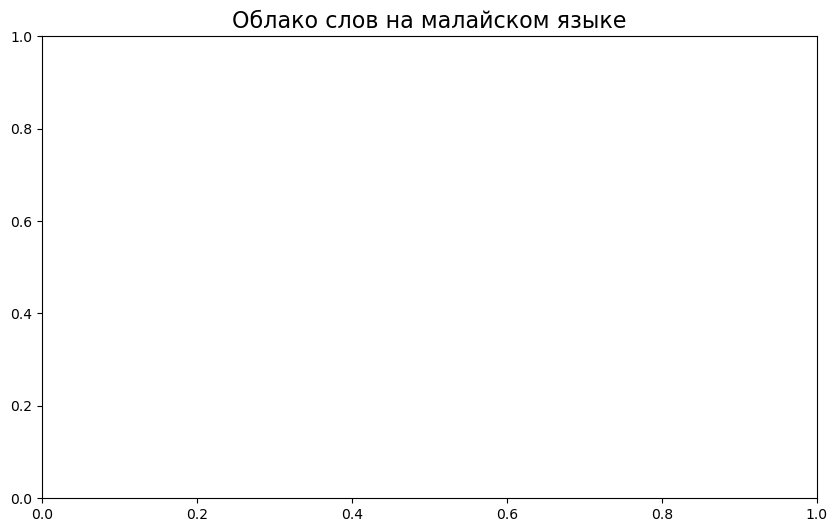

In [395]:
malay_texts = df[df["Language"] == "Malayalam"]["Text"].tolist()
def clean_text(text):                 
    return text

corpus = [clean_text(text) for text in malay_texts]



# 4. Генерация облака слов
wordcloud = WordCloud(
    width=800,
    height=400
).generate_from_frequencies(word_counts)

# 5. Визуализация
plt.figure(figsize=(10, 6))

plt.title('Облако слов на малайском языке', fontsize=16)
plt.show()